In [7]:
#This is a cool example of how you can use logistic regression to do image recognition.
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm, linear_model, datasets
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline

In [2]:
digits = datasets.load_digits()

In [3]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [4]:
len(digits.data)

1797

In [5]:
len(digits.data[0])

64

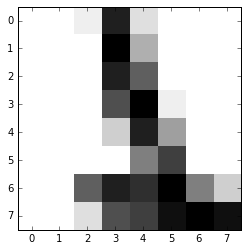

In [18]:
plt.imshow(digits.images[1000], cmap=plt.cm.gray_r, interpolation='nearest')

In [15]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
len(digits.target)

1797

In [17]:
digits.target[1000]

1

In [19]:
digits_X, digits_y = digits.data, digits.target

In [20]:
rbm = BernoulliRBM(random_state=0)

In [21]:
logistic = linear_model.LogisticRegression()

In [22]:
# I use a pipeline to do two things at once. Use the neural network to find features
# and use a logistic regression to classify
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

In [23]:
cross_val_score(classifier, digits_X, digits_y, cv=5, scoring='accuracy').mean()


0.10183423001815592

In [24]:
logistic = linear_model.LogisticRegression()
cross_val_score(logistic, digits_X, digits_y, cv=5, scoring='accuracy').mean()

0.92101881133607011

In [25]:
clf = svm.SVC()
clf.fit(digits_X,digits_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

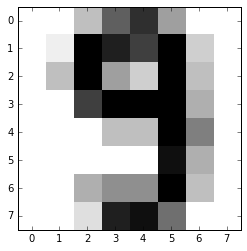

In [26]:
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')


In [27]:
clf.predict(digits.data[-5])

/Users/michaeltwardos/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([9])

In [28]:
cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()


0.44878680061604637

In [29]:
clf = svm.SVC(gamma=0.001, C=1)
cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()

0.9716361987950688

In [30]:
from sklearn.grid_search import GridSearchCV
clf = svm.SVC(C=1)
gamma_range = 10.**np.arange(-5, 2)
# C_range = 10.**np.arange(-2, 3)
param_grid = dict(gamma=gamma_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(digits_X, digits_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [31]:
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
grid_mean_scores

[0.89983305509181966,
 0.95492487479131882,
 0.97885364496382865,
 0.73678352810239289,
 0.10294936004451864,
 0.11185308848080133,
 0.10127991096271564]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

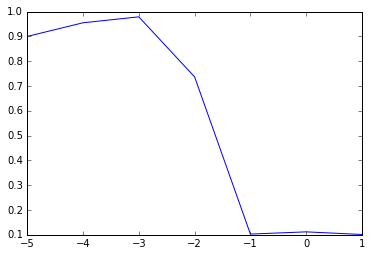

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(-5,2), grid_mean_scores)

# what was best?
grid.best_score_
grid.best_params_
grid.best_estimator_

In [33]:
iris = datasets.load_iris()
iris_X = iris.data[:, :2]

In [44]:
iris_y = iris.target

In [45]:
logistic = linear_model.LogisticRegression()
cross_val_score(logistic, iris_X, iris_y, cv=5, scoring='accuracy').mean()

0.76666666666666672

In [46]:
clf = svm.SVC()
cross_val_score(clf, iris_X, iris_y, cv=5, scoring='accuracy').mean()


0.81999999999999995

In [47]:

C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(iris_X, iris_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(iris_X, iris_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(iris_X, iris_y)

In [48]:
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

In [49]:
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

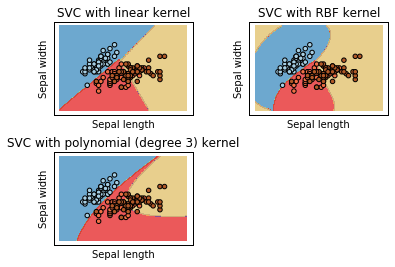

In [50]:
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

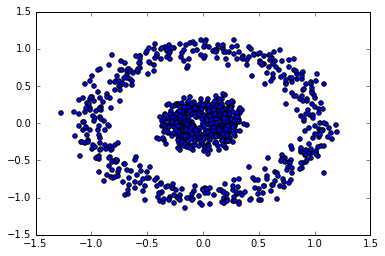

In [51]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0], circles_X[:,1])

In [52]:
logreg = LogisticRegression()
cross_val_score(logreg, circles_X, circles_y, cv=5, scoring='accuracy').mean()


0.48899999999999999

In [53]:
clf = svm.SVC(kernel = 'linear')        # I like lines
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()


0.65200000000000002

In [54]:
clf = svm.SVC(kernel = 'poly', degree = 3)        # I like 3rd degree polys
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()

0.56699999999999995

In [55]:
clf = svm.SVC(kernel = 'rbf')           # I like circles
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()


1.0

In [56]:
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(circles_X, circles_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(circles_X, circles_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(circles_X, circles_y)

In [57]:
x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

In [58]:
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

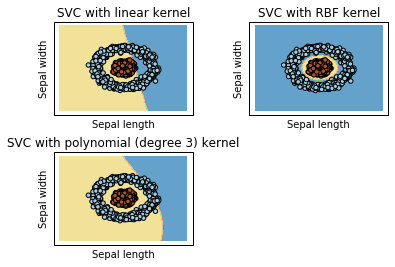

In [59]:
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

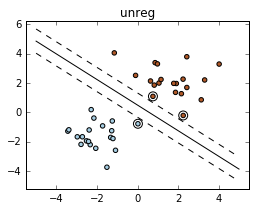

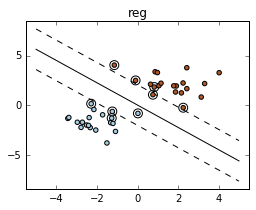

In [60]:
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    plt.title(name)

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    fignum = fignum + 1

plt.show()